In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():   
  
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

torch.cuda.is_available()
torch.cuda.get_device_name()
torch.cuda.current_device()
t = torch.cuda.get_device_properties(0).total_memory/1024/1024/1024
c = torch.cuda.memory_cached(0)
a = torch.cuda.memory_allocated(0)
print(t, c, a)

There are 1 GPU(s) available.
We will use the GPU: Quadro P2000
5.0 0 0


In [313]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
import re
from scipy import stats

import os
os.chdir("I:")

from tqdm.notebook import tqdm
tqdm.pandas()

C:\Users\Insight1\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [314]:
age = pd.read_pickle('notes_with_age_and_impairment.pkl')
age.sh

(54143, 5)

In [323]:
age['age'].value_counts()

81       1998
80       1893
82       1835
83       1752
84       1718
         ... 
51.82       1
66.49       1
94.26       1
69.77       1
69.71       1
Name: age, Length: 3088, dtype: int64

In [3]:
df = pd.read_pickle('notes_clean.pkl')

In [247]:
from string import digits

def rem_num(note):
    remove_digits = str.maketrans('', '', digits)
    no_num = note.translate(remove_digits)
    return no_num

rem_num(df['notes_clean'][0]) #should i remove numbers? eg A1c would be ac? try later

'requesting company coventry  valley green rd fort washington pa   med rec from  to  kenneth wayne dulyea has history of diabetes with peripheral circulatory disorder hyperlipidemia cad htn ckd osa  tia  obesity and nqncqmpiaijpeysjrgeries included pci with stent of rca i   diabetes was documented as diet controlled glucose was  and alc   aflcwas  actos was prescribed  october bp was   afcin march was  actos was increased july bp was   january bp was   prostate biopsy in january was benign bp was  hctz was prescribed march glucbsewas  and alc  glucophage was increased  february glucose was  and ac   shortness of breath with vertigo was documented in february bp was  ekg showed normal sinus rhythm  with nonspecific inferior twave abnormalities unstable angina was reported in march pci with stent of rcawas done b secondary to total occlusion ekg showed sinus rhythm with some stt changes of nonspecific nature pyuria and hematuria were identified vp showed calcified mass on the floor of th

In [57]:
# os.chdir("C:\\Users\\Insight1\\Anaconda3")
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Insight1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [248]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def lemma_stem_stop(note):
    word_tokens = word_tokenize(note)
    
    # lemmatization
    lemma_words = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in word_tokens:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_words.append(word3)

    # STOPWORDS
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", 
              "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", 
              "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", 
              "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    states = [x.lower() for x in states]
    
    stopwd = set(stopwords.words('english'))
    stopwd.update(['note', 'was', 'say','cite','vv','ii','iii','report', 'disclaim','disclaimer',
                   'request','underwrite','underwriter','life','expect','certify','take','company',
                  'id','written','write','ssn','social','security','number','llc']) 
    # add 'use'
    stopwd.update(states)
    filtered_sentence = [w for w in lemma_words if not w in stopwd] # can switch lemma or stem words
    
    #Stemming
    Stem_words = []
    ps =PorterStemmer()
    for w in filtered_sentence:
        rootWord=ps.stem(w)
        Stem_words.append(rootWord)
    
    lemma_stop_stem = Stem_words
    return lemma_stop_stem

In [249]:
df['lss_note'] = df['notes_clean'].progress_apply(lambda x: lemma_stem_stop(x))

In [252]:
df['len_lss'] = df['lss_note'].progress_apply(lambda x: len(x))

In [254]:
df['lss_corpus'] = df['lss_note'].progress_apply(lambda x: ' '.join(x))

In [90]:
os.chdir("I:")
df.to_pickle('lemma_stem_stop_filtered_note.pkl')

In [176]:
filt = (df['len_lss'] <=1000) & (df['len_lss'] >= 50) & (df['le_months']<=250 )
data = df[filt]

Text(0.5, 1.0, 'Number of Words per Note')

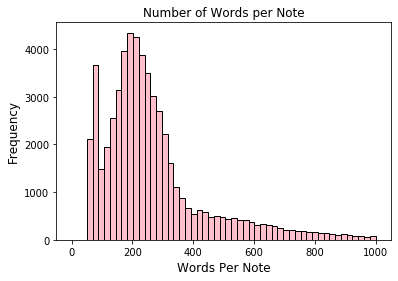

In [177]:
plt.hist(data['len_lss'].to_numpy(), bins = 50, color = 'pink', ec = 'black')
plt.xlabel('Words Per Note',fontsize =12)
plt.ylabel('Frequency',fontsize =12)
plt.xlim(-50,1050)
plt.title('Number of Words per Note')#### Plot life expectancy

In [178]:
filtwc = (df['len_lss'] >= 500) & (df['len_lss'] <= 600)
notewc = df.loc[filtwc, 'lss_note'].copy()
notewc.index = range(notewc.shape[0])

import random
a = random.randrange(len(notewc))

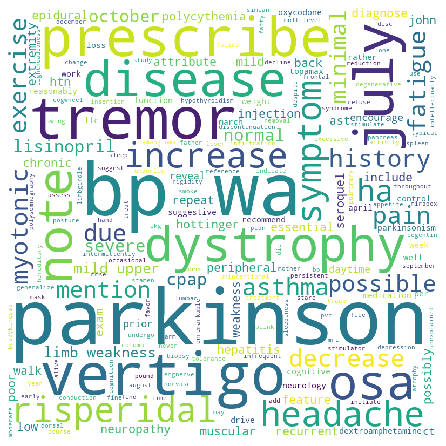

In [167]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
STOPWORDS.update(['noted', 'was', 'say','Was','cited','Vv','wa'])
stopwords = set(STOPWORDS)
wc = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords)

note = ' '.join(notewc[a][1]) 

wc.generate(note)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
# wc.to_file('note_wc7.png')

Text(0.5, 1.0, 'Remaining Life Expectancy  Distribution')

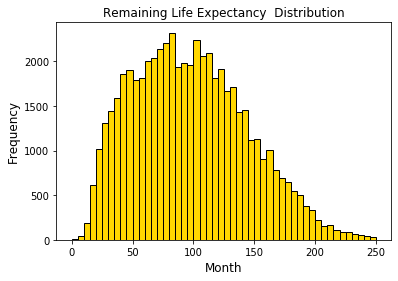

In [125]:
plt.hist(data['le_months'].to_numpy(), bins = 50, color = 'gold', ec = 'black')
plt.xlabel('Month', fontsize =12)
plt.ylabel('Frequency',fontsize =12)
plt.title('Remaining Life Expectancy  Distribution')

In [183]:
import spacy
nlp = spacy.load('en_core_web_lg')
df['spacy_lss'] = df['lss_note'].progress_apply(lambda x: nlp(' '.join(x[1])).vector)

In [204]:
df[['spacy_lss','len_lss','le_months']].to_pickle('spacy_lss.pkl')

## Wordcounts/TF-IDF

In [295]:
# transform len_lss
filt = (df['len_lss']>50) & (df['len_lss']<=1000) & (df['le_months']<= 250)  # filter data for ML
data = df[filt][['le_months','lss_note','lss_corpus']]

from sklearn.feature_extraction.text import CountVectorizer
corpus = data['lss_corpus'].tolist()
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) # sum word counts
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# return words_freq[:n]

vocab = [i[0] for i in words_freq[:4000]] # define vocabulary for tf-idf 4000 words

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=vocab)
corpus_tfidf = vectorizer.fit_transform(corpus)

In [351]:
X = corpus_tfidf.toarray()
y = data['le_months']

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
from sklearn.ensemble import RandomForestRegressor 
reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
reg_rf = RandomForestRegressor().fit(X_train, y_train)
y_test_rf = reg_rf.predict(X_test)
y_train_rf = reg_rf.predict(X_train)

print(reg_rf.score(X_train, y_train), reg_rf.score(X_test, y_test))
# r2 = 0.9483540267963761 0.6502525420270096 for n_estimator 100

0.9483540267963761 0.6502525420270096


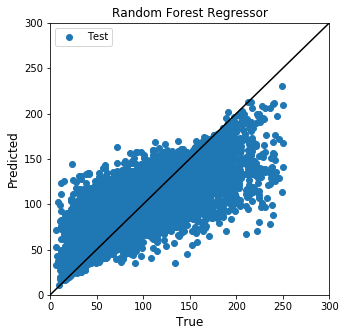

In [360]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_rf, label = 'Test')
# plt.scatter(y_train, y_train_rf, label = 'Train')
plt.plot(range(300), range(300), '-k')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.title("Random Forest Regressor")
plt.xlabel("True",fontsize =12)
plt.ylabel("Predicted",fontsize =12)
plt.legend()
plt.show()